In [3]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math 
import time
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
import seaborn as sns
%matplotlib inline


In [4]:
#loading the all three datasets
confirmed_cases=pd.read_csv("C:\\Users\\TUSHAR SAIN\\Downloads\\time_series_covid-19_confirmed.csv")
death_reported=pd.read_csv("C:\\Users\\TUSHAR SAIN\\Downloads\\time_series_covid-19_deaths.csv")
recovered_cases=pd.read_csv("C:\\Users\\TUSHAR SAIN\\Downloads\\time_series_covid-19_recovered.csv")

In [5]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [6]:
death_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [20]:
#extracting only the dates columns that have information of confirmed ,deaths and recovered cases
confirmed=confirmed_cases.iloc[:,4:]
deaths=death_reported.iloc[:,4:]
recoveries=recovered_cases.iloc[:,4:]



In [21]:
#check the head of the outbreak cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [22]:
#finding the total confirmed cases,dath cases and the recovered cases and append them to an 4 empty lists
#also,calculate the total mortality rate which is the death_sum/confirmed cases
dates=confirmed.keys()
world_cases=[]
total_deaths=[]
mortality_rate=[]
total_recovered=[]
for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [23]:
#lets display each of the newly created variables
confirmed_sum

167449

In [24]:
death_sum

6440

In [25]:
recovered_sum

76034

In [26]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [27]:
#converting all the dates ab=nd the cases into numpy arrays
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [31]:
print(days_since_1_22)
print(world_cases)
print(total_deaths)
print(total_recovered)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]]
[[   555]
 [   653]
 [   941]
 [  1434]
 [  2118]
 [  2927]
 [  5578]
 [  6166]
 [  8234]
 [  9927]
 [ 12038]
 [ 16787]
 [ 19881]
 [ 23892]
 [ 27635]
 [ 30817]
 [ 34391]
 [ 37120]
 [ 40150]
 [ 42762]
 [ 44802]
 [ 45221]
 [ 60368]
 [ 66885]
 [ 69030]
 [ 71224]
 [ 73258]
 [ 75136]
 [ 75639]
 [ 76197]
 [ 76823]
 [ 78579]
 [ 78965]
 [ 79568]
 [ 80413]
 [ 81395]
 [ 82754]
 [ 84120]
 [ 86011]
 [ 88369]
 [ 90306]
 [ 92840]
 [ 95120]
 [ 97882]
 [101784]
 [105821]
 [109795]
 [113561]
 [118592]
 [125865]
 [128343]
 [145193]
 [156097]
 [167449]]
[[  17]
 [  18]
 [  26]
 [  42]
 [  56]
 [  82]
 [ 131]
 [ 133]
 [ 171]
 [ 213]
 [ 259]
 [ 362]
 [ 426]
 [ 492]
 [ 564]
 [ 634]
 [ 719

In [38]:
#future prediction
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]
print(future_forecast)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]]


In [43]:
#converting all the integers into datetime for better visualization
start='1/22/2020'
start_date=datetime.datetime.strptime(start,"%m/%d/%Y")
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    

In [41]:
#for the visualization with the data 
latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=death_reported[dates[-1]]
latest_recoveries=recovered_cases[dates[-1]]

In [42]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [44]:
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [45]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [47]:
#unique countries
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [48]:
#total number of confirmed cases of each country
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)
unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
                  country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [50]:
#number of cases per country
print("Confirmed cases by countries/Region")
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]}cases')

Confirmed cases by countries/Region
China:81003cases
Italy:24747cases
Iran:13938cases
Korea, South:8162cases
Spain:7798cases
Germany:5795cases
France:4513cases
US:3499cases
Switzerland:2200cases
Norway:1221cases
United Kingdom:1144cases
Netherlands:1135cases
Sweden:1022cases
Belgium:886cases
Denmark:875cases
Austria:860cases
Japan:839cases
Cruise Ship:696cases
Malaysia:428cases
Qatar:401cases
Greece:331cases
Australia:297cases
Czechia:253cases
Canada:252cases
Israel:251cases
Portugal:245cases
Finland:244cases
Singapore:226cases
Slovenia:219cases
Bahrain:214cases
Estonia:171cases
Iceland:171cases
Brazil:162cases
Philippines:140cases
Romania:131cases
Ireland:129cases
Poland:119cases
Indonesia:117cases
Iraq:116cases
Thailand:114cases
India:113cases
Kuwait:112cases
Egypt:110cases
Lebanon:110cases
Saudi Arabia:103cases
San Marino:101cases
United Arab Emirates:98cases
Chile:74cases
Russia:63cases
Luxembourg:59cases
Taiwan*:59cases
Vietnam:56cases
Slovakia:54cases
Pakistan:53cases
South Afric

In [52]:
#list of unique provinces
unique_provinces=list(confirmed_cases['Province/State'].unique())
#non provinance states
outliers=['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)
    

In [53]:
#number of confirmed cases in the province,state or city
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

In [55]:
#number of cases in each province
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]}case')

British Columbia:73case
New South Wales:134case
Victoria:57case
Queensland:61case
South Australia:20case
Western Australia:17case
Tasmania:6case
Northern Territory:1case
Ontario:104case
Alberta:39case
Quebec:24case
Washington:643case
New York:732case
California:426case
Massachusetts:164case
Diamond Princess:742case
Grand Princess:23case
Georgia:99case
Colorado:131case
Florida:115case
New Jersey:98case
Oregon:36case
Texas:72case
Illinois:93case
Pennsylvania:66case
Iowa:18case
Maryland:32case
North Carolina:33case
South Carolina:28case
Tennessee:39case
Virginia:45case
Arizona:13case
Indiana:20case
Kentucky:20case
District of Columbia:16case
Nevada:24case
New Hampshire:13case
Minnesota:35case
Nebraska:17case
Ohio:37case
Rhode Island:20case
Wisconsin:32case
Connecticut:24case
Hawaii:6case
Oklahoma:7case
Utah:28case
Kansas:8case
Louisiana:91case
Missouri:5case
Vermont:8case
Alaska:1case
Arkansas:16case
Delaware:7case
Idaho:5case
Maine:12case
Michigan:33case
Mississippi:10case
Montana:7case


In [57]:
#handling the nan values
nan_indices=[]
for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)
for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

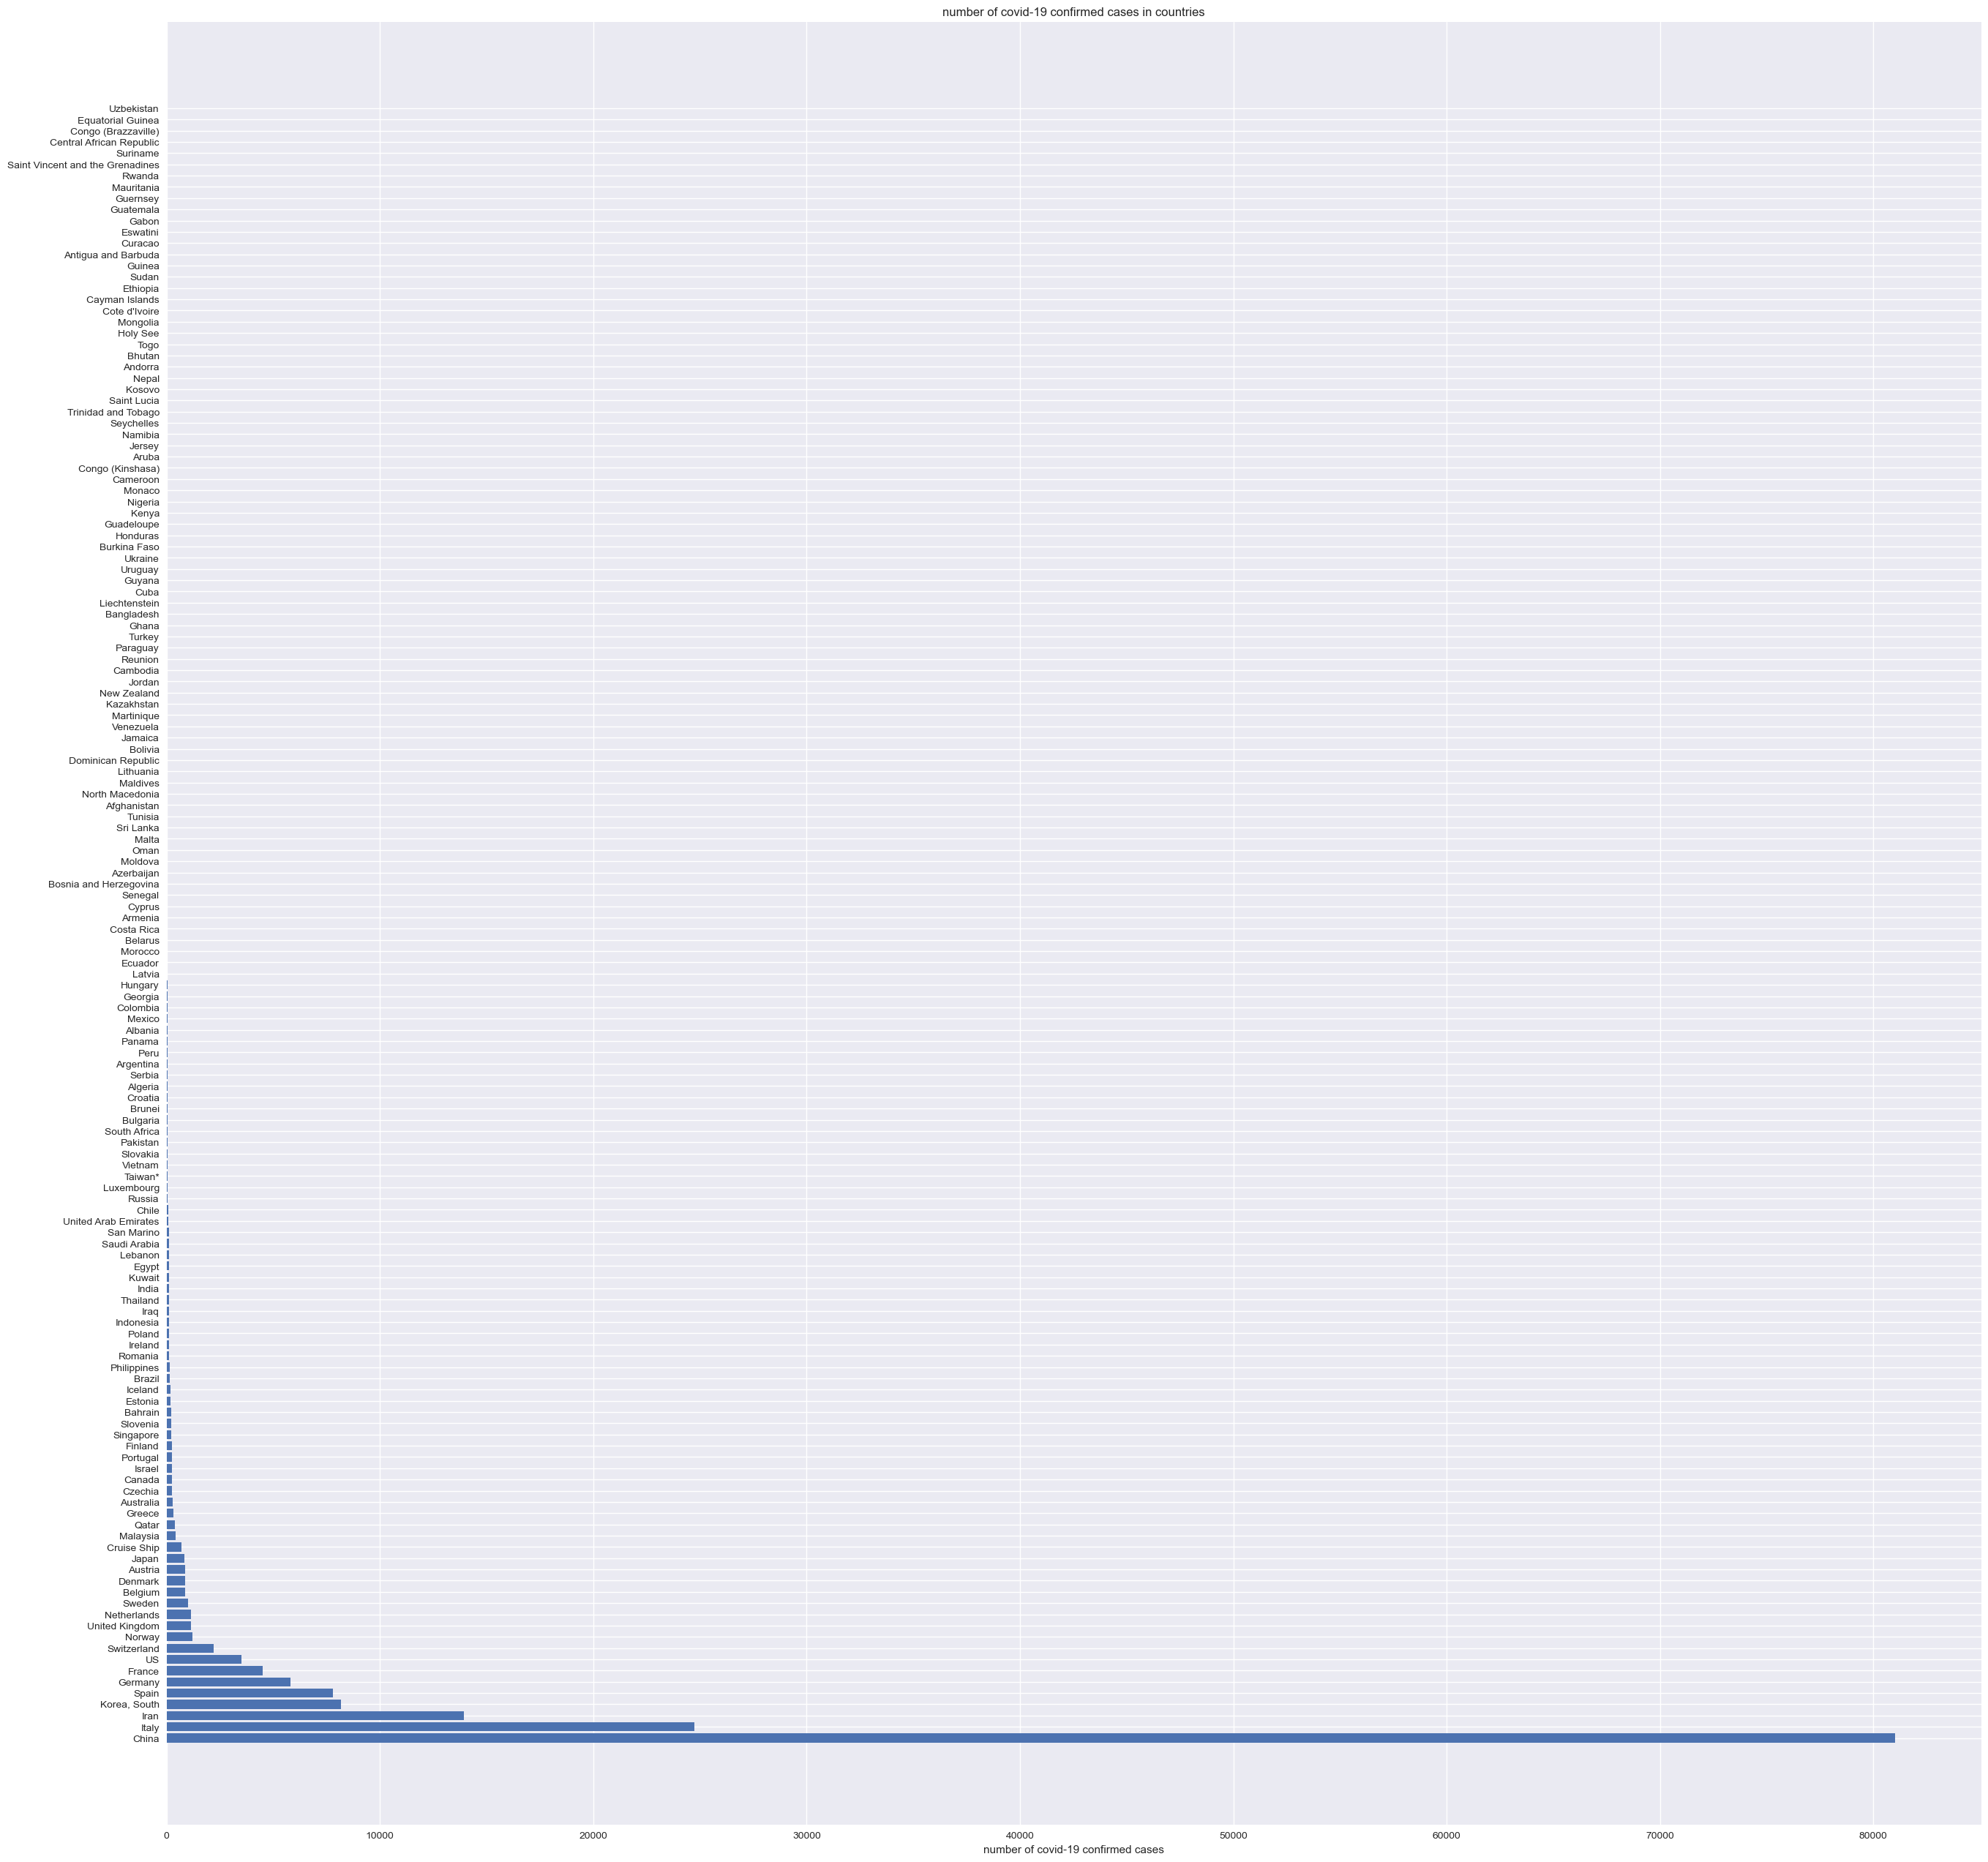

In [58]:
#bar graph to see the total confirmed cases across different countries
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('number of covid-19 confirmed cases in countries')
plt.xlabel('number of covid-19 confirmed cases')
plt.show()

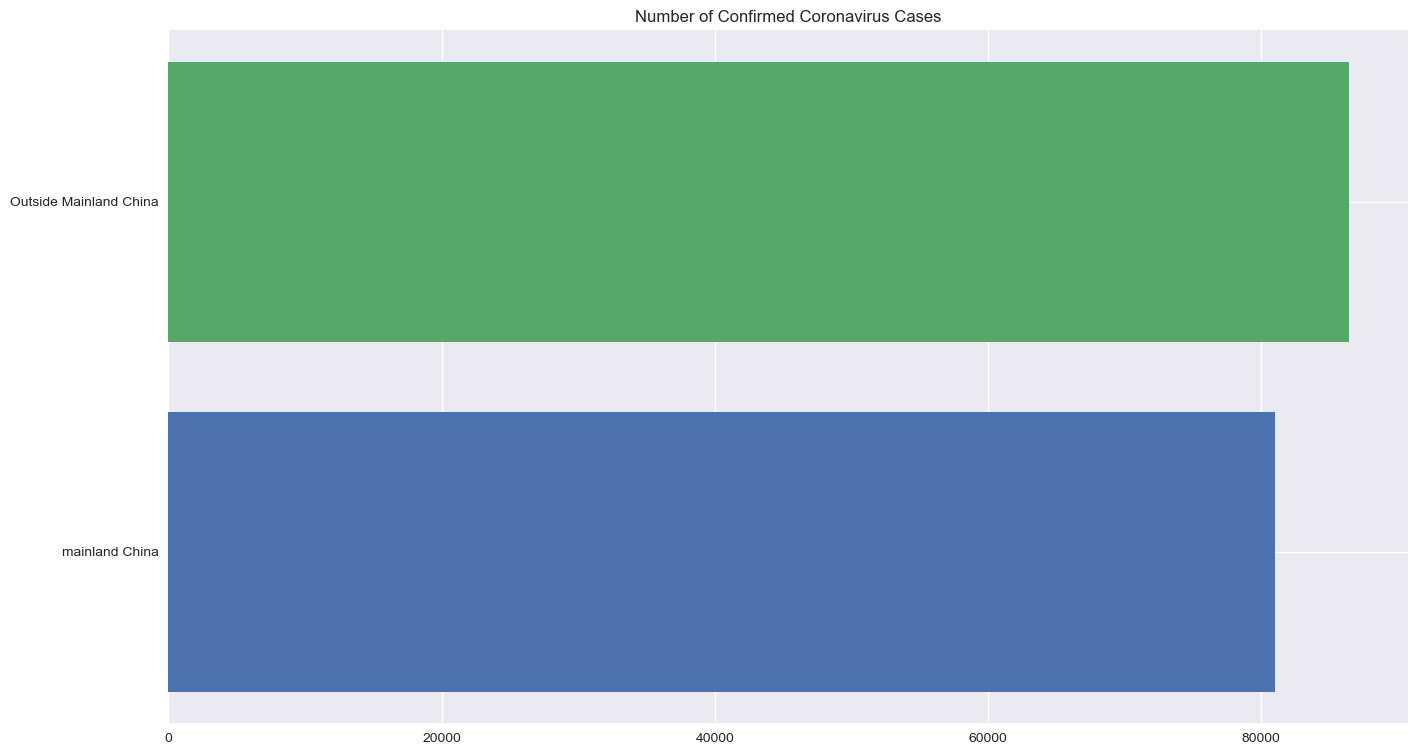

In [60]:
china_confirmed=latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed=np.sum(country_confirmed_cases)-china_confirmed
plt.figure(figsize=(16,9))
plt.barh('mainland China',china_confirmed)
plt.barh('Outside Mainland China',outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [61]:
#toatal cases in mainland china and outside of it
print("Outside Mainland china {} cases:".format(outside_mainland_china_confirmed))
print("Mainland china:{} cases".format(china_confirmed))
print("total:{} cases".format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland china 86446 cases:
Mainland china:81003 cases
total:167449 cases


In [63]:
#showing 10 countries with the most confirmed cases
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
visual_unique_countries.append('Other')
visual_confirmed_cases.append(others)

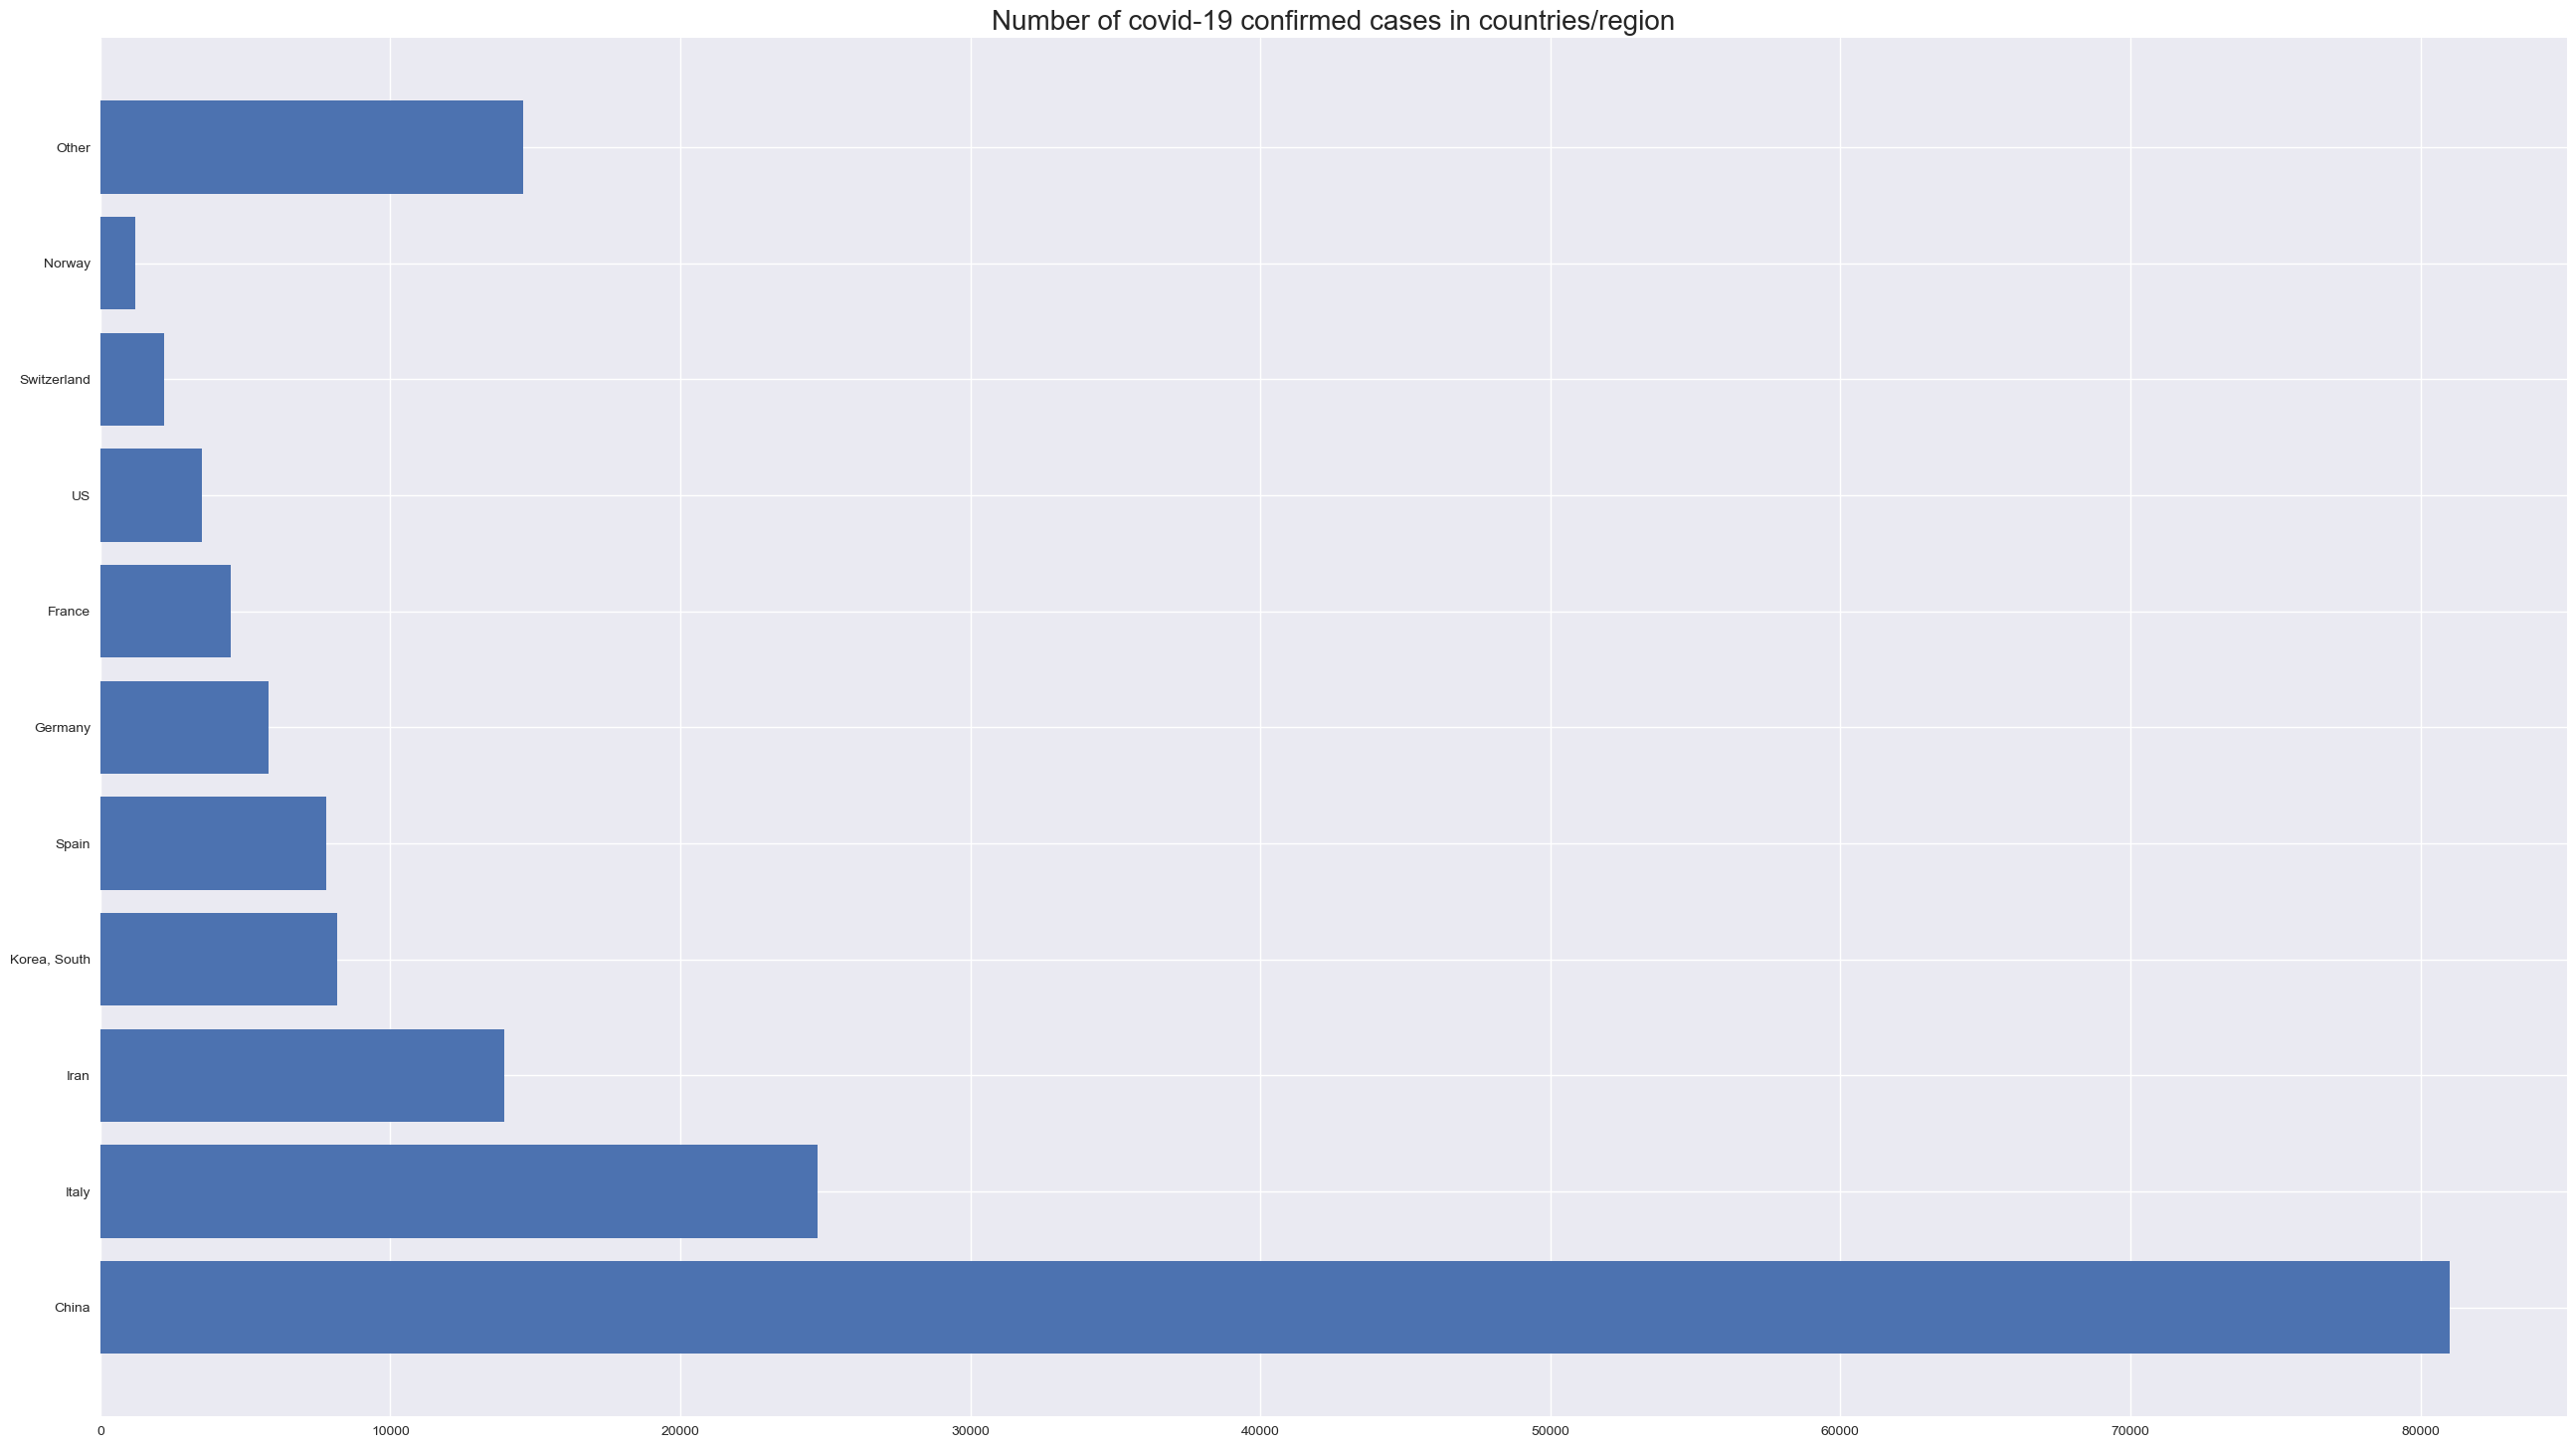

In [64]:
#visualize 10 countries
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title("Number of covid-19 confirmed cases in countries/region",size=20)
plt.show()

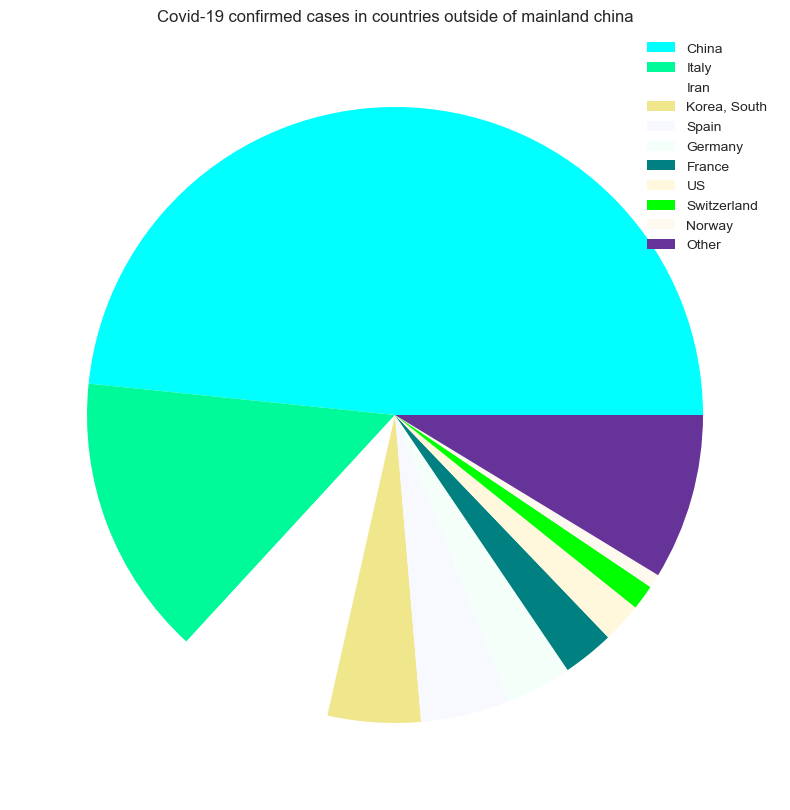

In [70]:
#pie chart to see the total confirmed cases in 10 different countries
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(10,10))
plt.title("Covid-19 confirmed cases in countries outside of mainland china")
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.show()

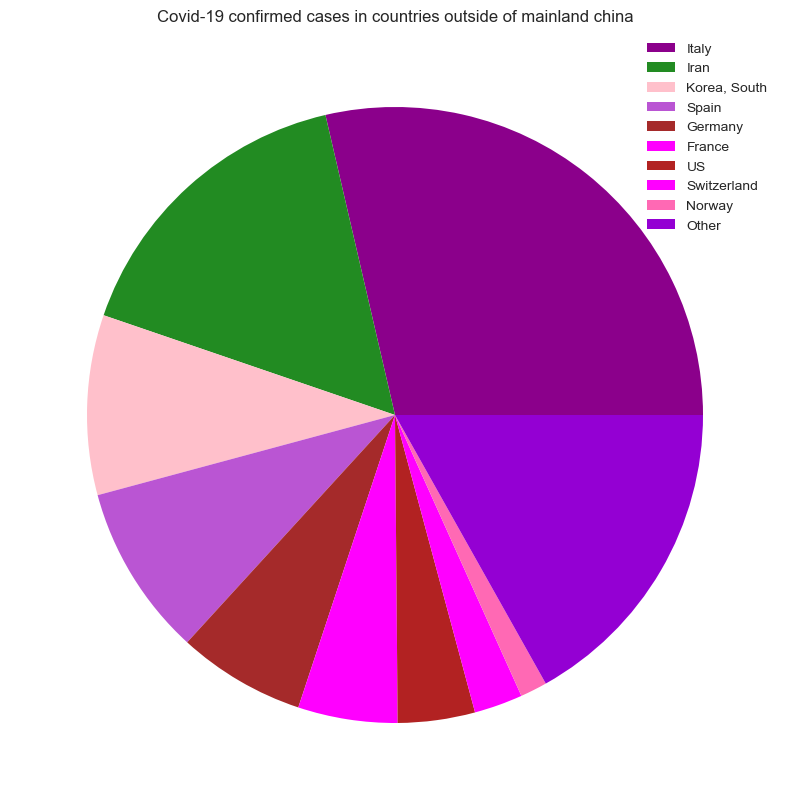

In [71]:
#pie chart for countries outside china
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(10,10))
plt.title("Covid-19 confirmed cases in countries outside of mainland china")
plt.pie(visual_confirmed_cases[1:],colors=c)
plt.legend(visual_unique_countries[1:],loc='best')
plt.show()

In [79]:
#SVM model
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)
kernel=["poly","sigmoid","rbf"]
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={"kernel":kernel,"C":c,"gamma":gamma,"epsilon":epsilon,"shrinking":shrinking}

svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring="neg_mean_squared_error",cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\TUSHAR SAIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [82]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 10}

In [83]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [84]:
svm_confirmed

SVR(C=10, gamma=0.01, kernel='poly')

In [85]:
svm_pred

array([ 30387.44430898,  30388.42176407,  30395.26394972,  30413.83559647,
        30450.00143487,  30509.62619549,  30598.57460886,  30722.71140555,
        30887.90131611,  31100.00907109,  31364.89940103,  31688.4370365 ,
        32076.48670805,  32534.91314622,  33069.58108157,  33686.35524466,
        34391.10036603,  35189.68117623,  36087.96240583,  37091.80878537,
        38207.0850454 ,  39439.65591648,  40795.38612915,  42280.14041398,
        43899.78350151,  45660.1801223 ,  47567.19500689,  49626.69288584,
        51844.53848971,  54226.59654904,  56778.73179439,  59506.80895631,
        62416.69276535,  65514.24795206,  68805.339247  ,  72295.83138072,
        75991.58908377,  79898.4770867 ,  84022.36012007,  88369.10291443,
        92944.57020032,  97754.62670831, 102805.13716895, 108101.96631278,
       113650.97887036, 119458.03957224, 125529.01314897, 131869.76433112,
       138486.15784922, 145384.05843383, 152569.33081551, 160047.8397248 ,
       167825.44989226, 1

MAE 16262.408868487113
MSE 284689228.296391


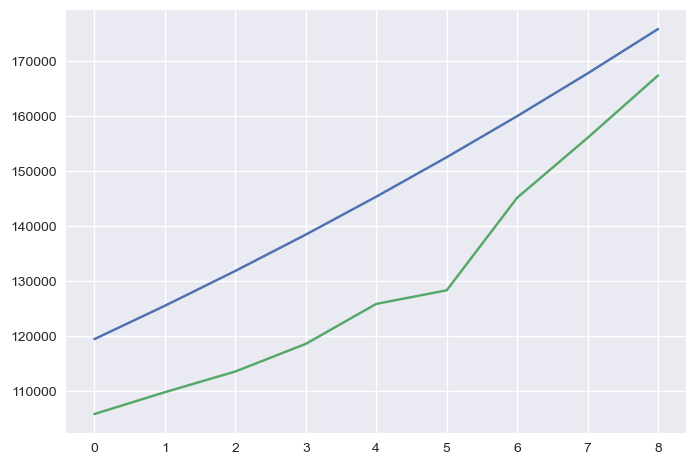

In [86]:
#against test data
svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print("MAE",mean_absolute_error(svm_test_pred,y_test_confirmed))
print("MSE",mean_squared_error(svm_test_pred,y_test_confirmed))

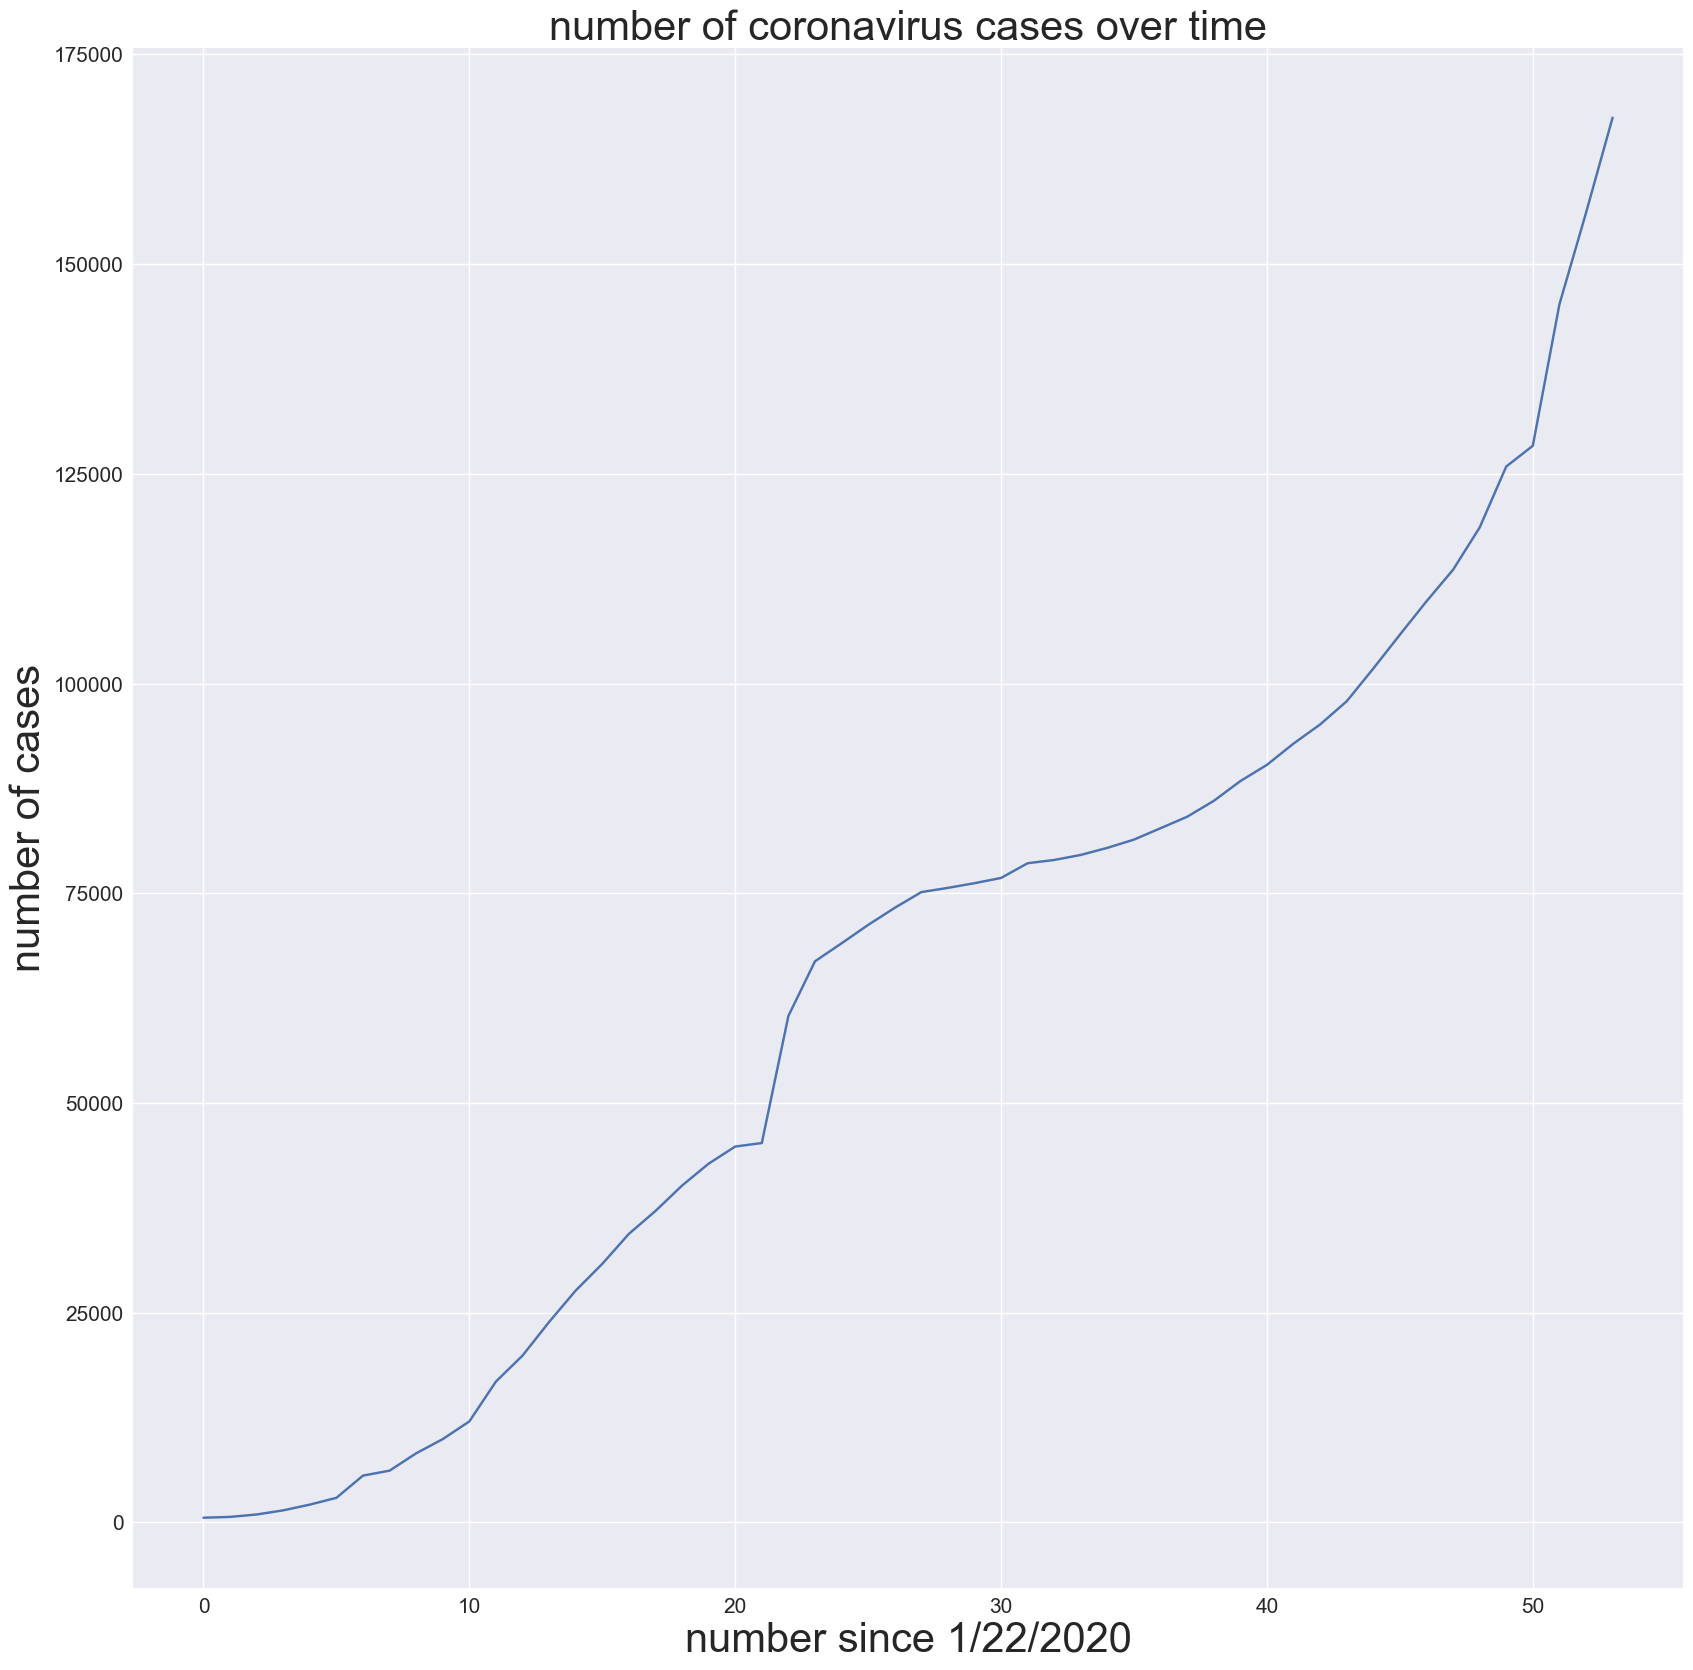

In [89]:
#total number of corona virus cases
plt.figure(figsize=(20,20))
plt.plot(adjusted_dates,world_cases)
plt.title("number of coronavirus cases over time",size=30)
plt.xlabel("number since 1/22/2020",size=30)
plt.ylabel("number of cases",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


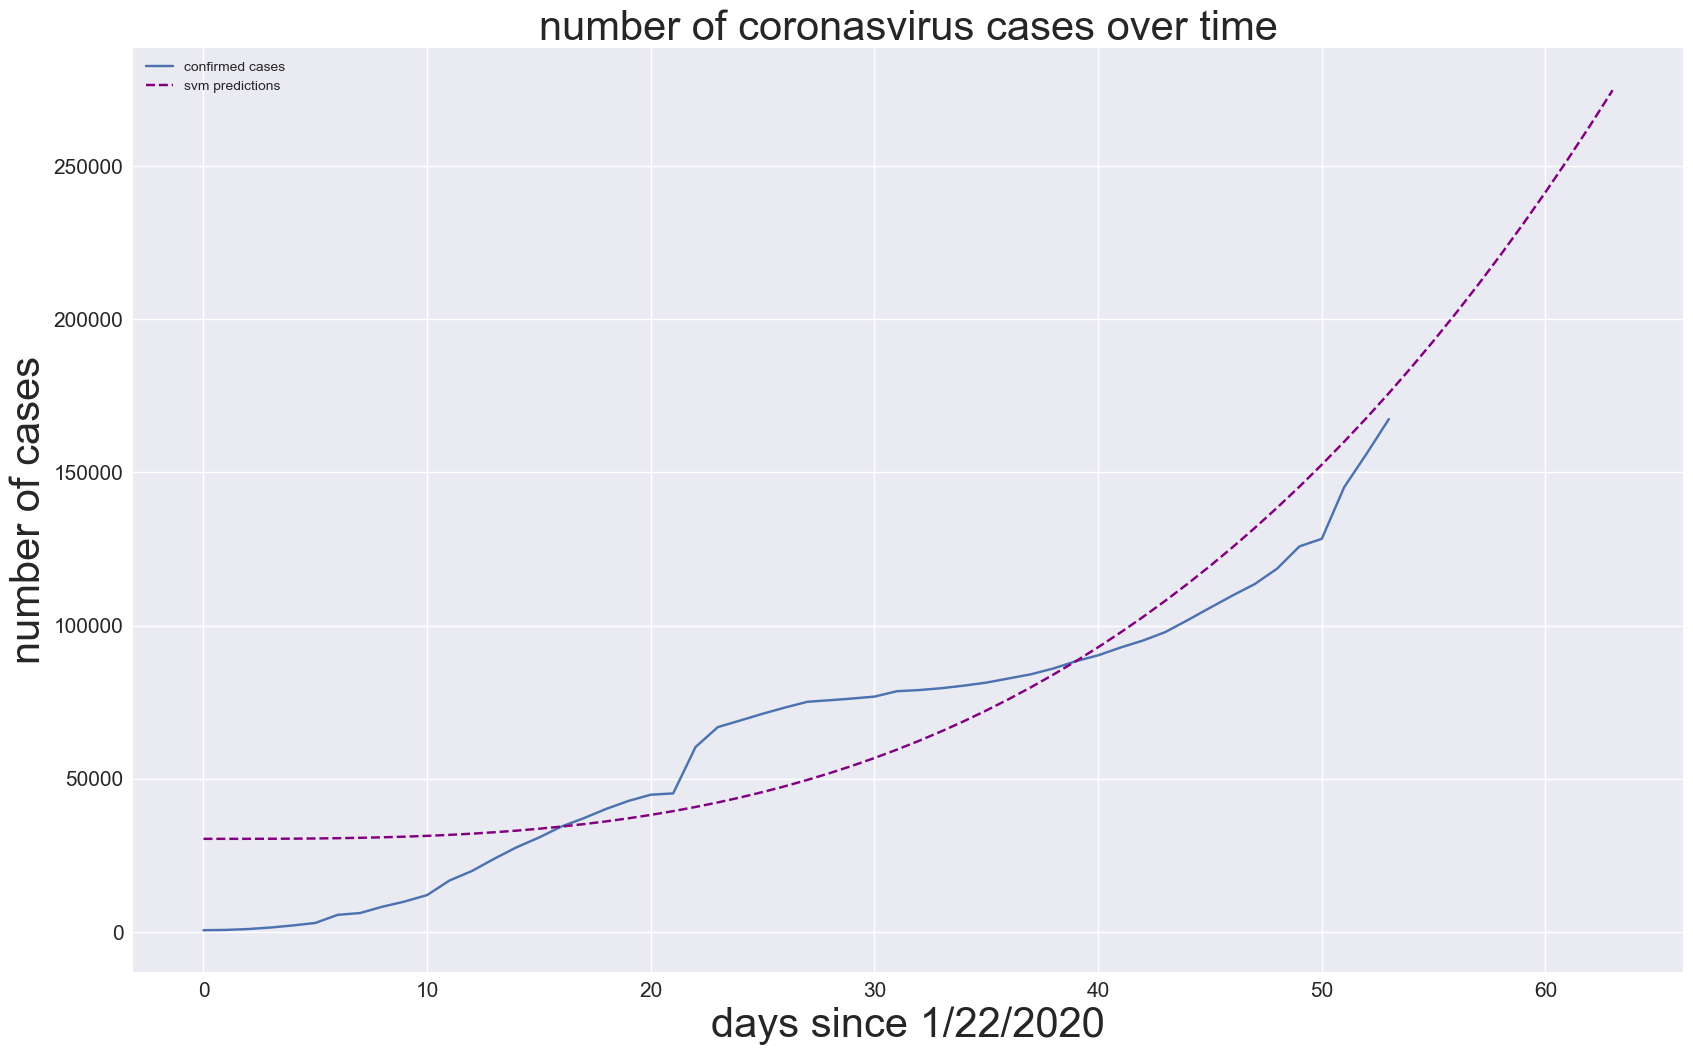

In [90]:
#cofirmed vs predicted cases
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle="dashed",color="purple")
plt.title("number of coronasvirus cases over time",size=30)
plt.xlabel("days since 1/22/2020",size=30)
plt.ylabel("number of cases",size=30)
plt.legend(['confirmed cases',"svm predictions"])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [91]:
#prediction for the next 10 days using svm
print("svm future predicton:")
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

svm future predicton:


{('03/16/2020', 184301.4329238902),
 ('03/17/2020', 193011.53524916767),
 ('03/18/2020', 202044.19775482191),
 ('03/19/2020', 211405.28517140614),
 ('03/20/2020', 221100.66222947178),
 ('03/21/2020', 231136.19365957196),
 ('03/22/2020', 241517.74419225854),
 ('03/23/2020', 252251.1785580839),
 ('03/24/2020', 263342.36148760037),
 ('03/25/2020', 274797.15771136014)}

In [98]:
#using the linear regression model
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(X_train_confirmed,y_train_confirmed)
test_linear_pred=linear_model.predict(X_test_confirmed)
linear_pred=linear_model.predict(future_forecast)
print("MAE:",mean_absolute_error(test_linear_pred,y_test_confirmed))
print("MSE:",mean_squared_error(test_linear_pred,y_test_confirmed))


MAE: 11965.537037037033
MSE: 307996364.0108404


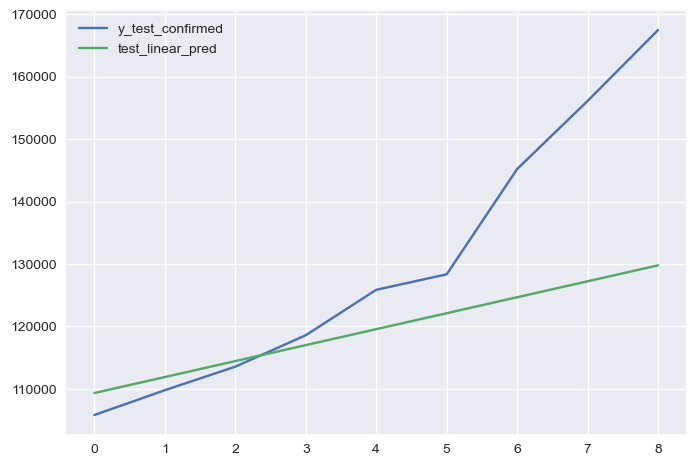

In [101]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(["y_test_confirmed","Test_linear_pred"])

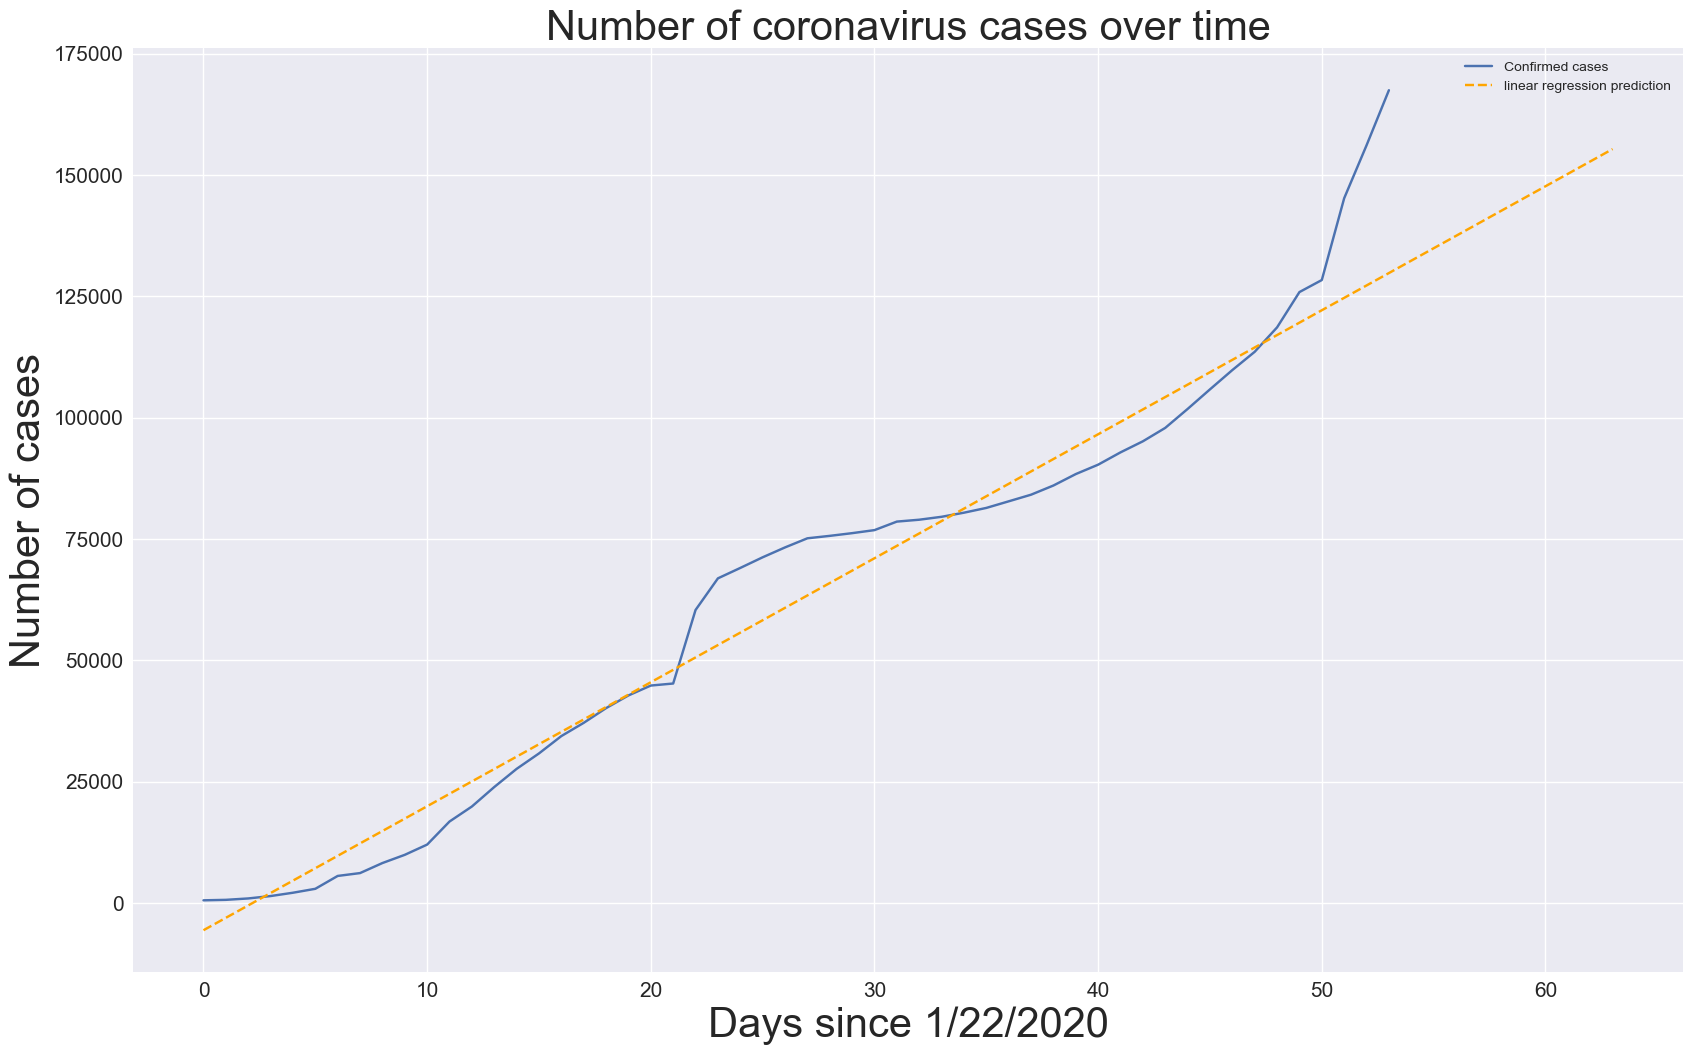

In [106]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,linear_pred,linestyle="dashed",color="orange")
plt.title("Number of coronavirus cases over time",size=30)
plt.xlabel("Days since 1/22/2020",size=30)
plt.ylabel("Number of cases",size=30)
plt.legend(["Confirmed cases","linear regression prediction"])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [107]:
#preediction for the next 10 dasys using linear rregression
print("Linear regression futureprediction:")
print(linear_pred[-10:])

Linear regression futureprediction:
[[132336.25252525]
 [134890.72222222]
 [137445.19191919]
 [139999.66161616]
 [142554.13131313]
 [145108.6010101 ]
 [147663.07070707]
 [150217.54040404]
 [152772.01010101]
 [155326.47979798]]


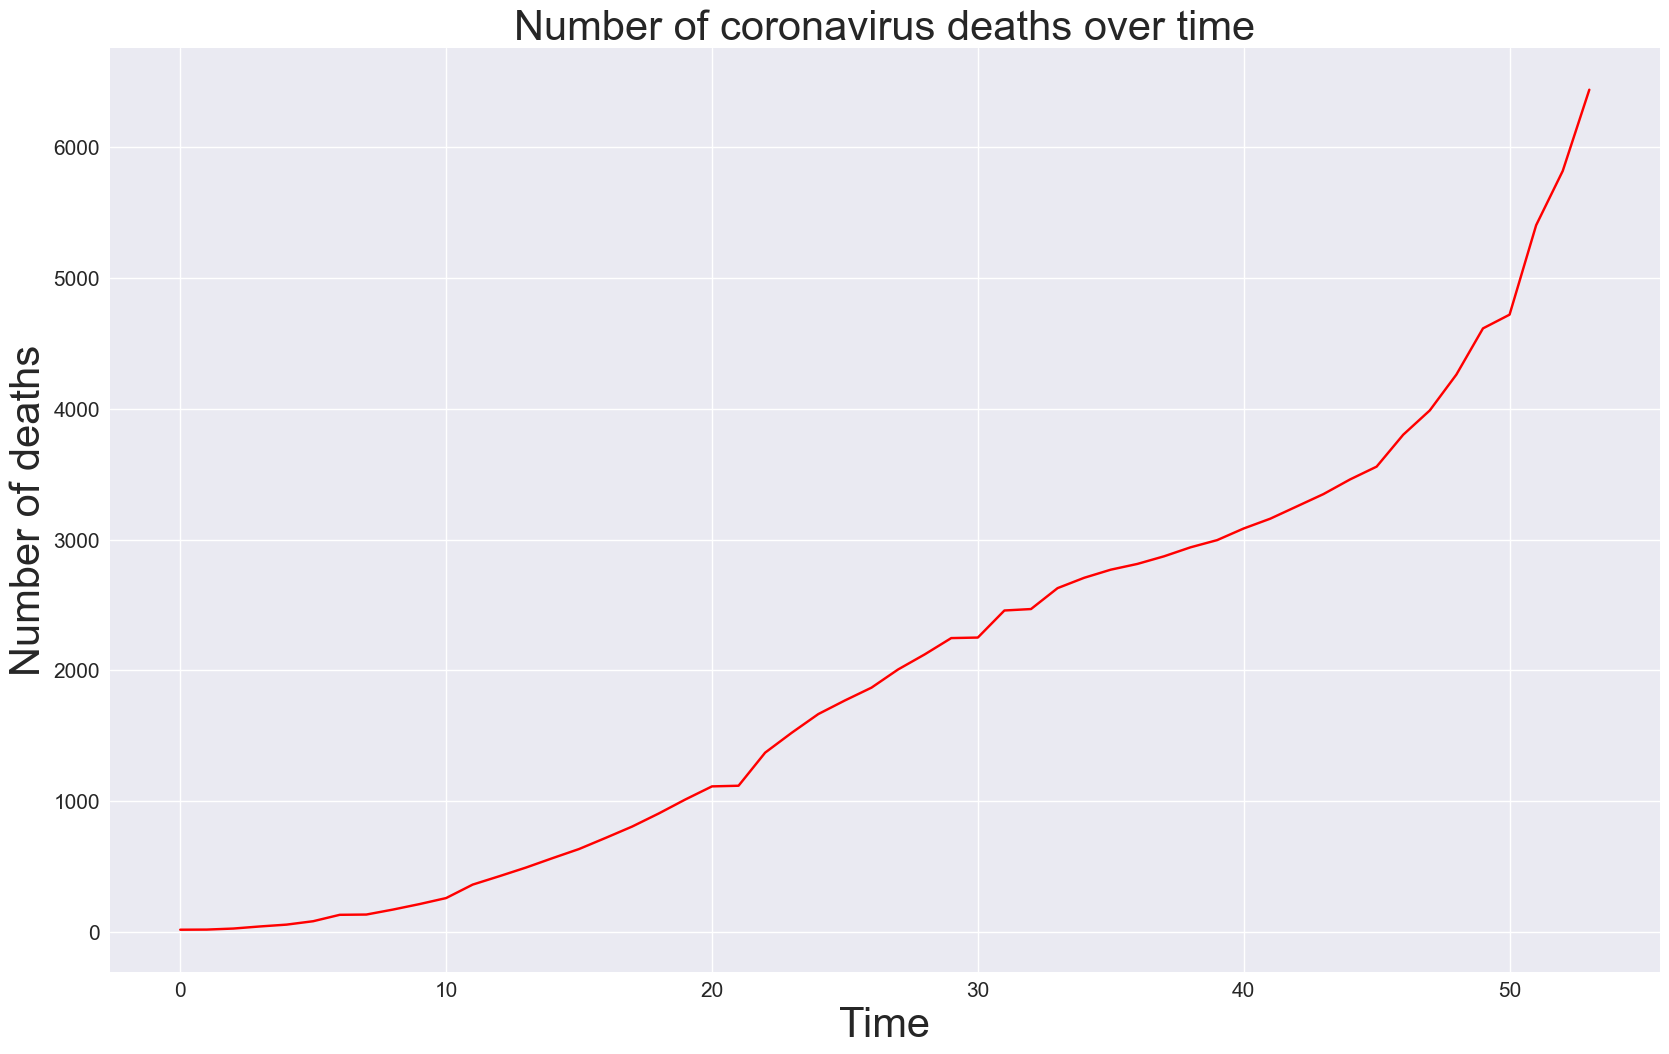

In [109]:
#toatal deaths over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths,color="red")
plt.title("Number of coronavirus deaths over time",size=30)
plt.xlabel("Time",size=30)
plt.ylabel("Number of deaths",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

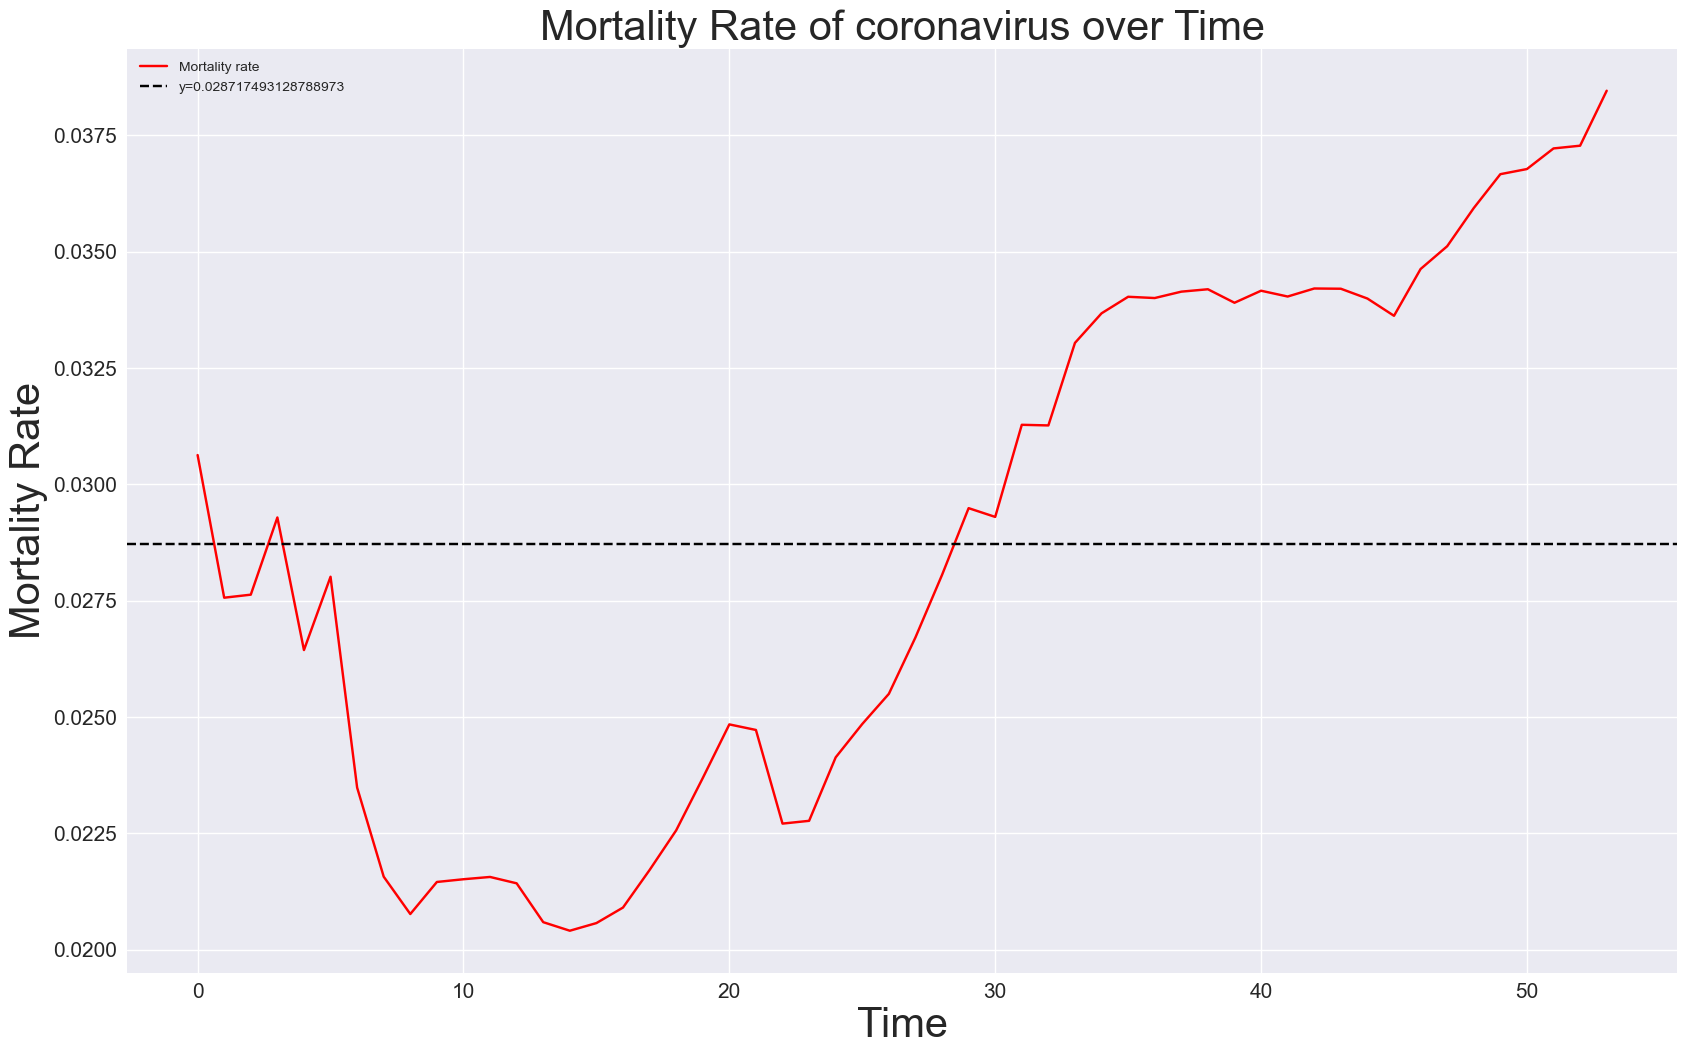

In [111]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate,color="red")
plt.axhline(y=mean_mortality_rate,linestyle="--",color="black")
plt.title("Mortality Rate of coronavirus over Time",size=30)
plt.legend(["Mortality rate","y="+str(mean_mortality_rate)])
plt.xlabel("Time",size=30)
plt.ylabel("Mortality Rate",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

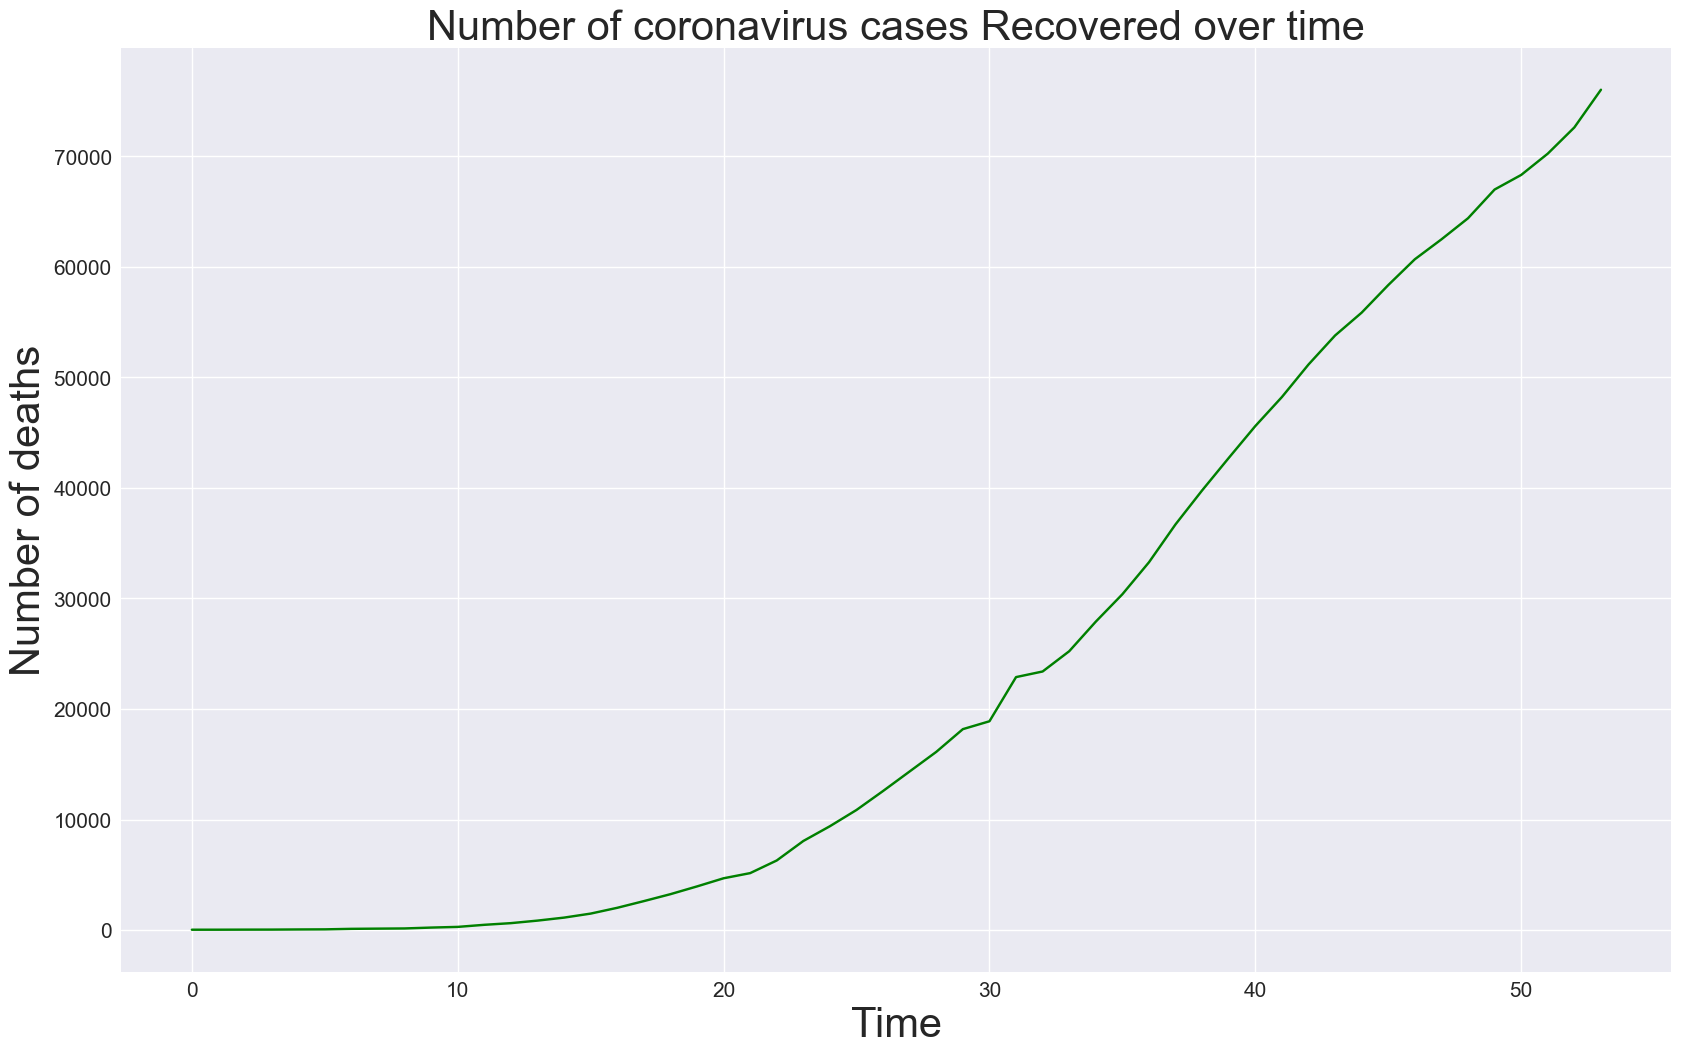

In [113]:
#coronavirus cases Recovered Over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_recovered,color="green")
plt.title("Number of coronavirus cases Recovered over time",size=30)
plt.xlabel("Time",size=30)
plt.ylabel("Number of deaths",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

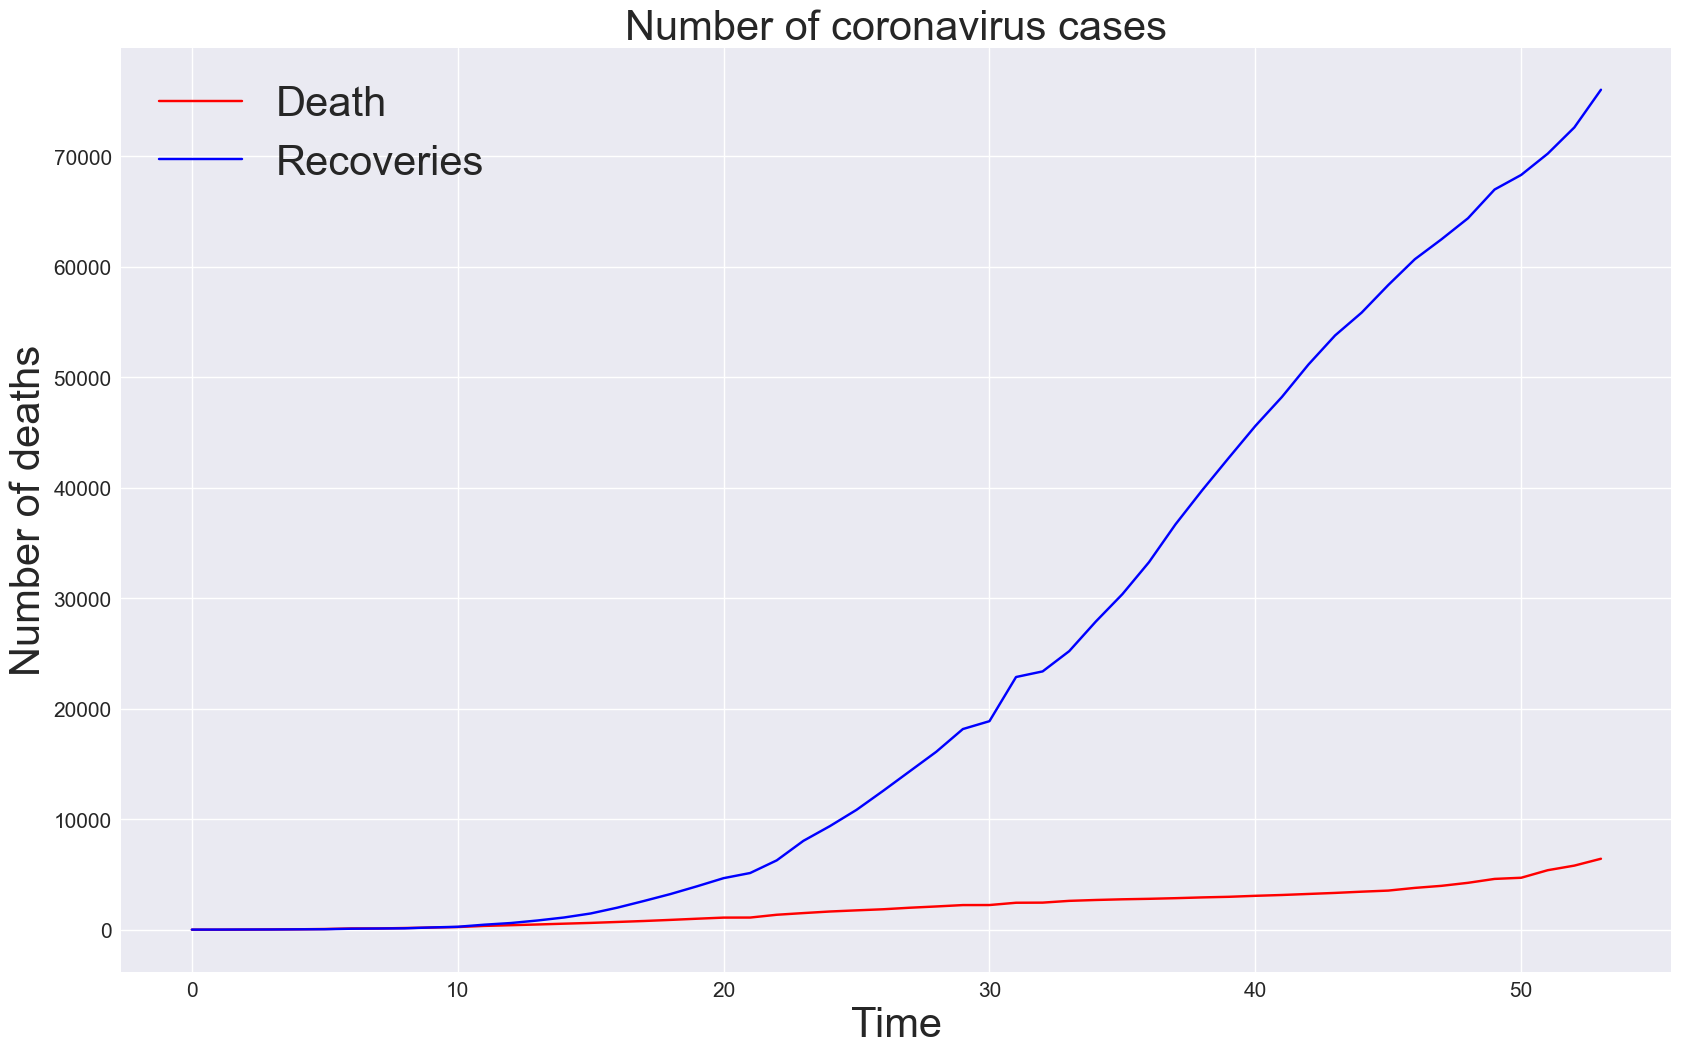

In [116]:
#coronavirus cases Recovered vs deaths 
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths,color="r")
plt.plot(adjusted_dates,total_recovered,color="b")
plt.legend(["Death","Recoveries"],loc="best",fontsize=30)
plt.title("Number of coronavirus cases",size=30)
plt.xlabel("Time",size=30)
plt.ylabel("Number of deaths",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

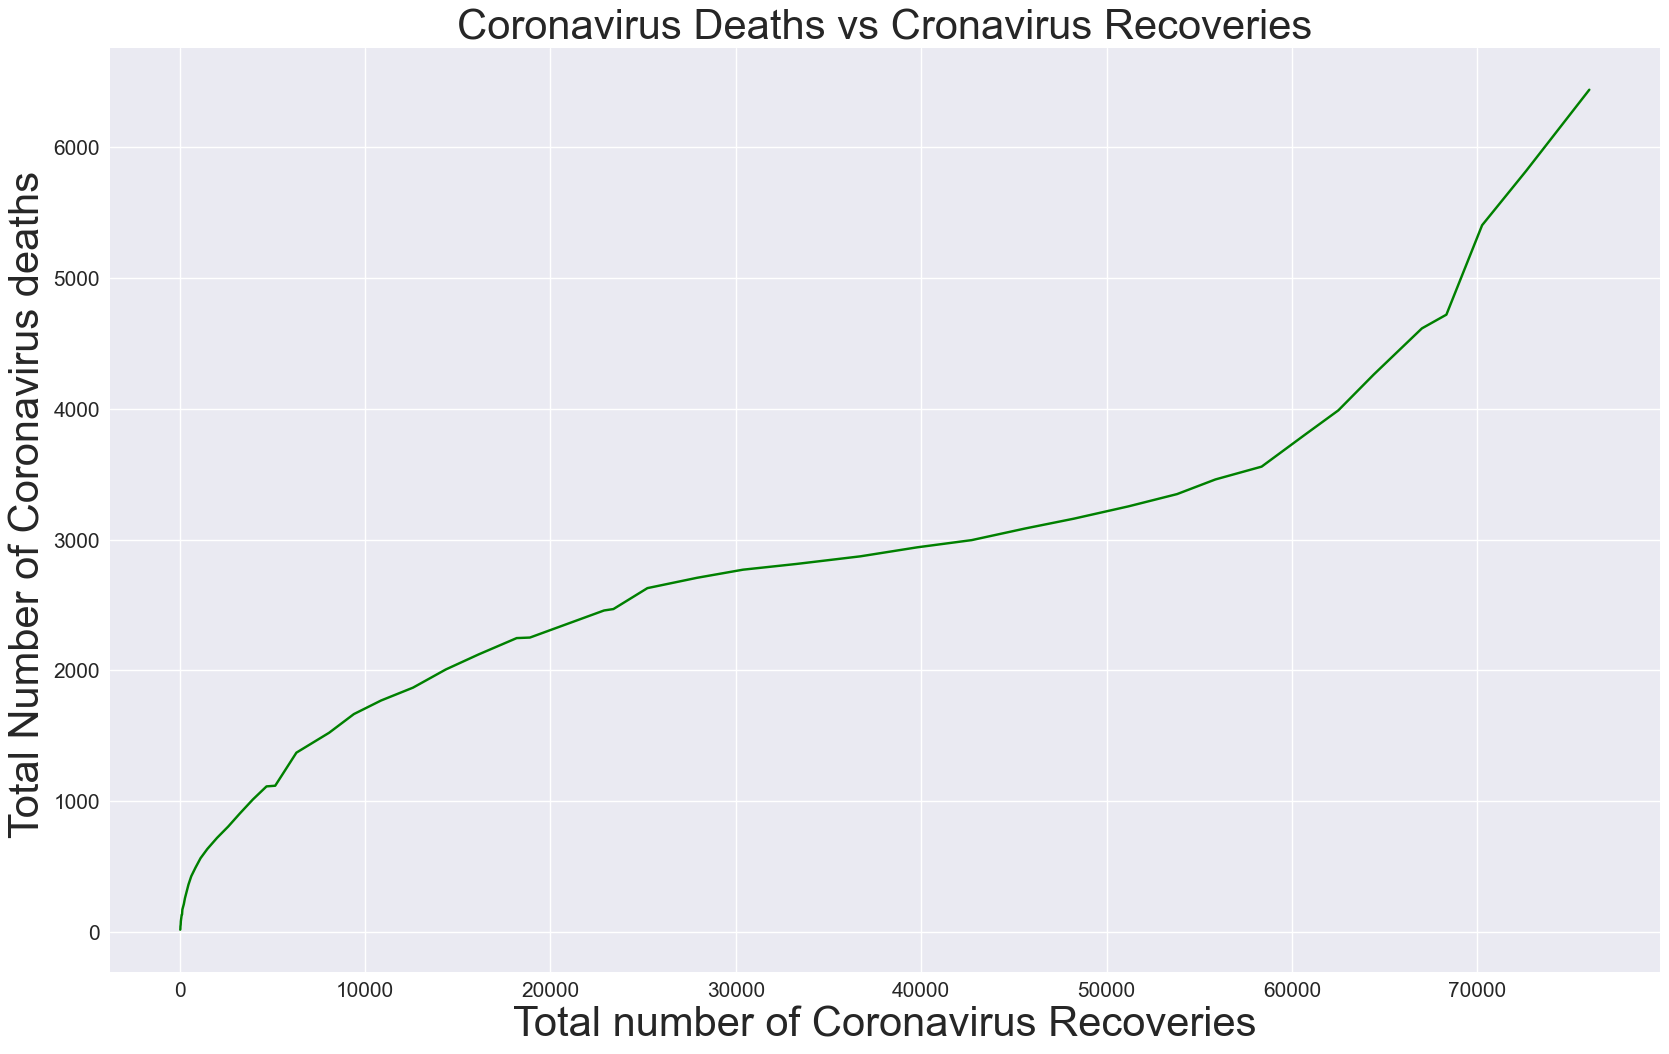

In [118]:
#coronavirus cases Recovered vs deaths 
plt.figure(figsize=(20,12))
plt.plot(total_recovered,total_deaths,color="g")
plt.title("Coronavirus Deaths vs Cronavirus Recoveries",size=30)
plt.xlabel("Total number of Coronavirus Recoveries",size=30)
plt.ylabel(" Total Number of Coronavirus deaths",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()